# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['port elizabeth', 'vung tau', 'bluff', 'ardesen', 'mehamn', 'whitehorse', 'qaanaaq', 'punta arenas', 'monrovia', 'udachnyy', 'arraial do cabo', 'barentsburg', 'longyearbyen', 'hobart', 'east london', 'saskylakh', 'mount gambier', 'mataura', 'kavieng', 'port blair', 'vardo', 'port jervis', 'luderitz', 'souillac', 'atuona', 'warsaw', 'busselton', 'chokurdakh', 'eschwege', 'chuy', 'hilo', 'skjervoy', 'tamiahua', 'airai', 'asekeyevo', 'ust-kuyga', 'te anau', 'pasighat', 'belaya gora', 'saint george', 'rikitea', 'rajbiraj', 'jalu', 'huarmey', 'barrow', 'adrar', 'upington', 'amderma', 'thompson', 'lasa', 'muros', 'camana', 'new norfolk', 'ayr', 'nokaneng', 'ushuaia', 'kodiak', 'cherskiy', 'ucluelet', 'ocos', 'price', 'gbarnga', 'castro', 'carnarvon', 'illoqqortoormiut', 'ancud', 'khatanga', 'butaritari', 'nikolskoye', 'tiksi', 'puerto ayora', 'andra', 'tiarei', 'banyo', 'taoudenni', 'port alfred', 'taolanaro', 'georgetown', 'altamont', 'hillsborough', 'coquimbo', 'tasiilaq', 'villazon', 'al

In [3]:
cities

['port elizabeth',
 'vung tau',
 'bluff',
 'ardesen',
 'mehamn',
 'whitehorse',
 'qaanaaq',
 'punta arenas',
 'monrovia',
 'udachnyy',
 'arraial do cabo',
 'barentsburg',
 'longyearbyen',
 'hobart',
 'east london',
 'saskylakh',
 'mount gambier',
 'mataura',
 'kavieng',
 'port blair',
 'vardo',
 'port jervis',
 'luderitz',
 'souillac',
 'atuona',
 'warsaw',
 'busselton',
 'chokurdakh',
 'eschwege',
 'chuy',
 'hilo',
 'skjervoy',
 'tamiahua',
 'airai',
 'asekeyevo',
 'ust-kuyga',
 'te anau',
 'pasighat',
 'belaya gora',
 'saint george',
 'rikitea',
 'rajbiraj',
 'jalu',
 'huarmey',
 'barrow',
 'adrar',
 'upington',
 'amderma',
 'thompson',
 'lasa',
 'muros',
 'camana',
 'new norfolk',
 'ayr',
 'nokaneng',
 'ushuaia',
 'kodiak',
 'cherskiy',
 'ucluelet',
 'ocos',
 'price',
 'gbarnga',
 'castro',
 'carnarvon',
 'illoqqortoormiut',
 'ancud',
 'khatanga',
 'butaritari',
 'nikolskoye',
 'tiksi',
 'puerto ayora',
 'andra',
 'tiarei',
 'banyo',
 'taoudenni',
 'port alfred',
 'taolanaro',
 'geo

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#URL & Units 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
#query_url = url + "appid=" + api_key + "&q=" + cities

#Practice Query

query_url_practice = f"{url}appid={weather_api_key}&q={cities[10]}&units={units}"
print(query_url_practice)

city_response = requests.get(query_url_practice)
city_json = city_response.json()

http://api.openweathermap.org/data/2.5/weather?appid=d82a211ce8f4b33e377aad1047db5710&q=arraial do cabo&units=imperial


In [5]:
print(json.dumps(city_json, indent=4))

{
    "coord": {
        "lon": -42.0278,
        "lat": -22.9661
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 75.52,
        "feels_like": 76.59,
        "temp_min": 75.52,
        "temp_max": 75.52,
        "pressure": 1012,
        "humidity": 81,
        "sea_level": 1012,
        "grnd_level": 1010
    },
    "visibility": 10000,
    "wind": {
        "speed": 21.97,
        "deg": 36,
        "gust": 27.72
    },
    "clouds": {
        "all": 99
    },
    "dt": 1618720190,
    "sys": {
        "country": "BR",
        "sunrise": 1618736538,
        "sunset": 1618777925
    },
    "timezone": -10800,
    "id": 3471451,
    "name": "Arraial do Cabo",
    "cod": 200
}


In [6]:
#Finding needed Variables in Data set
print(city_json["coord"])
print(city_json["coord"]["lon"])
print(city_json["coord"]["lat"])
print(city_json["main"]["temp_max"])
print(city_json["main"]["humidity"])
print(city_json["clouds"]["all"])
print(city_json["wind"]["speed"])
print(city_json["sys"]["country"])
print(city_json["dt"])
print(city_json["name"])

{'lon': -42.0278, 'lat': -22.9661}
-42.0278
-22.9661
75.52
81
99
21.97
BR
1618720190
Arraial do Cabo


In [7]:
#cities = []

# set up lists to hold reponse info
#lat = []
#temp = []
#Clouds = []
#Date = []


# Loop through the list of cities and perform a request for data on each
#for city in cities:
    #response = requests.get(query_url + city).json()
    #lat.append(response['coord']['lat'])
    #temp.append(response['main']['temp'])

#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")

In [8]:
count = 1
groupcount = 1

city_name = []
lon = []
lat = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
linebreak = "---------------------------------------------------------------------------"

print("Looping Through Cities")
print(linebreak)

for city in cities:
    
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
#    print(query_url)
    
    try:
        city_response = requests.get(query_url)
        city_json = city_response.json()
        city_name.append(city_json["name"])
        lon.append(city_json["coord"]["lon"])
        lat.append(city_json["coord"]["lat"])
        max_temp.append(city_json["main"]["temp_max"])
        humidity.append(city_json["main"]["humidity"])
        cloudiness.append(city_json["clouds"]["all"])
        wind_speed.append(city_json["wind"]["speed"])
        country.append(city_json["sys"]["country"])
        date.append(city_json["dt"])
        
        print(f"Processing Record {count} of Set {groupcount} | {city}")
        count += 1
        
    except:
        print("City not found. Skipping ...")
        pass
        
    if count > 50:
            groupcount += 1
            count = 1
            
print(linebreak)
print("Data Retrieval Complete")
print(linebreak)

Looping Through Cities
---------------------------------------------------------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | vung tau
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | ardesen
Processing Record 5 of Set 1 | mehamn
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | monrovia
Processing Record 10 of Set 1 | udachnyy
Processing Record 11 of Set 1 | arraial do cabo
City not found. Skipping ...
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | mount gambier
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | kavieng
Processing Record 19 of Set 1 | port blair
Processing Record 20 of Set 1 | vardo
Processing Record 21 of Set 1 | port jerv

Processing Record 39 of Set 4 | alofi
Processing Record 40 of Set 4 | kaitangata
Processing Record 41 of Set 4 | pisco
Processing Record 42 of Set 4 | praia da vitoria
Processing Record 43 of Set 4 | ormara
Processing Record 44 of Set 4 | margate
Processing Record 45 of Set 4 | naze
Processing Record 46 of Set 4 | carmen
Processing Record 47 of Set 4 | dingle
Processing Record 48 of Set 4 | tibati
Processing Record 49 of Set 4 | visby
City not found. Skipping ...
Processing Record 50 of Set 4 | henties bay
Processing Record 1 of Set 5 | nabire
Processing Record 2 of Set 5 | kenai
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | murray bridge
Processing Record 5 of Set 5 | chapais
Processing Record 6 of Set 5 | coahuayana
Processing Record 7 of Set 5 | bekovo
Processing Record 8 of Set 5 | poya
Processing Record 9 of Set 5 | sinnamary
Processing Record 10 of Set 5 | santa barbara
City not found. Skipping ...
Processing Record 11 of Set 5 | dawson creek
Processing Reco

Processing Record 29 of Set 8 | atbasar
Processing Record 30 of Set 8 | boone
Processing Record 31 of Set 8 | cranbrook
Processing Record 32 of Set 8 | cayenne
Processing Record 33 of Set 8 | srednekolymsk
Processing Record 34 of Set 8 | qaqortoq
Processing Record 35 of Set 8 | itigi
Processing Record 36 of Set 8 | saquena
Processing Record 37 of Set 8 | baghdad
Processing Record 38 of Set 8 | sao filipe
Processing Record 39 of Set 8 | garden city
City not found. Skipping ...
Processing Record 40 of Set 8 | college
Processing Record 41 of Set 8 | san cristobal
Processing Record 42 of Set 8 | waddan
City not found. Skipping ...
Processing Record 43 of Set 8 | lubao
Processing Record 44 of Set 8 | tigil
Processing Record 45 of Set 8 | petrolina
Processing Record 46 of Set 8 | bow island
Processing Record 47 of Set 8 | tsybli
Processing Record 48 of Set 8 | oranjestad
Processing Record 49 of Set 8 | bukama
Processing Record 50 of Set 8 | charleville-mezieres
Processing Record 1 of Set 9 |

Processing Record 17 of Set 12 | daru
Processing Record 18 of Set 12 | hasaki
Processing Record 19 of Set 12 | lodwar
Processing Record 20 of Set 12 | ballina
Processing Record 21 of Set 12 | praya
Processing Record 22 of Set 12 | kuhdasht
Processing Record 23 of Set 12 | penzance
Processing Record 24 of Set 12 | khamanon
Processing Record 25 of Set 12 | cheremukhovo
Processing Record 26 of Set 12 | etah
Processing Record 27 of Set 12 | asosa
Processing Record 28 of Set 12 | kayerkan
Processing Record 29 of Set 12 | tiruchchendur
Processing Record 30 of Set 12 | kafue
Processing Record 31 of Set 12 | ratlam
Processing Record 32 of Set 12 | flagstaff
Processing Record 33 of Set 12 | trairi
Processing Record 34 of Set 12 | fukue
Processing Record 35 of Set 12 | yarada
Processing Record 36 of Set 12 | leh
Processing Record 37 of Set 12 | mattru
Processing Record 38 of Set 12 | pinega
Processing Record 39 of Set 12 | lake havasu city
Processing Record 40 of Set 12 | san quintin
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# created a data frame from cities, lat, temp, and other variables
dict = {"City": city_name, "Latitude": lat, "Longitute": lon, "Max Temp (F)": max_temp, "Humidity": humidity, 
       "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country, "Date": date}
cities_df = pd.DataFrame(dict)
cities_df

,City,Latitude,Longitute,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,51.80,87,0,3.44,ZA,1618720191
1,Vung Tau,10.3460,107.0843,83.73,63,95,7.96,VN,1618720191
2,Bluff,-46.6000,168.3333,57.99,67,86,15.99,NZ,1618720023
3,Ardeşen,41.1911,40.9875,60.80,67,75,20.71,TR,1618720192
4,Mehamn,71.0357,27.8492,34.93,78,78,13.82,NO,1618720040
...,...,...,...,...,...,...,...,...,...
588,Lake Havasu City,34.4839,-114.3224,73.40,13,1,13.80,US,1618720403
589,San Quintín,30.4833,-115.9500,56.82,85,0,8.68,MX,1618720404
590,Aykhal,66.0000,111.5000,7.39,87,100,17.45,RU,1618720395
591,Bocana de Paiwas,12.7857,-85.1227,73.87,92,97,2.01,NI,1618720404


In [10]:
cities_df.to_csv(output_data_file, index=False, header=True)
cities_df

,City,Latitude,Longitute,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,51.80,87,0,3.44,ZA,1618720191
1,Vung Tau,10.3460,107.0843,83.73,63,95,7.96,VN,1618720191
2,Bluff,-46.6000,168.3333,57.99,67,86,15.99,NZ,1618720023
3,Ardeşen,41.1911,40.9875,60.80,67,75,20.71,TR,1618720192
4,Mehamn,71.0357,27.8492,34.93,78,78,13.82,NO,1618720040
...,...,...,...,...,...,...,...,...,...
588,Lake Havasu City,34.4839,-114.3224,73.40,13,1,13.80,US,1618720403
589,San Quintín,30.4833,-115.9500,56.82,85,0,8.68,MX,1618720404
590,Aykhal,66.0000,111.5000,7.39,87,100,17.45,RU,1618720395
591,Bocana de Paiwas,12.7857,-85.1227,73.87,92,97,2.01,NI,1618720404


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
cities_df["Humidity"]==100

0      False
1      False
2      False
3      False
4      False
       ...  
588    False
589    False
590    False
591    False
592    False
Name: Humidity, Length: 593, dtype: bool

In [12]:
#Using the loc and ILOC function dropping cities over 100% Humiditiy
#https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns

new_city_data_df = cities_df.loc[(cities_df["Humidity"]>100)]
new_city_data_df.count()


City            0
Latitude        0
Longitute       0
Max Temp (F)    0
Humidity        0
Cloudiness      0
Wind Speed      0
Country         0
Date            0
dtype: int64

In [13]:
#no cities in the data frame have Humidity over 100% per the loc function I ran. 

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cities_df = pd.read_csv(output_data_file)
cities_df


,City,Latitude,Longitute,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,51.80,87,0,3.44,ZA,1618720191
1,Vung Tau,10.3460,107.0843,83.73,63,95,7.96,VN,1618720191
2,Bluff,-46.6000,168.3333,57.99,67,86,15.99,NZ,1618720023
3,Ardeşen,41.1911,40.9875,60.80,67,75,20.71,TR,1618720192
4,Mehamn,71.0357,27.8492,34.93,78,78,13.82,NO,1618720040
...,...,...,...,...,...,...,...,...,...
588,Lake Havasu City,34.4839,-114.3224,73.40,13,1,13.80,US,1618720403
589,San Quintín,30.4833,-115.9500,56.82,85,0,8.68,MX,1618720404
590,Aykhal,66.0000,111.5000,7.39,87,100,17.45,RU,1618720395
591,Bocana de Paiwas,12.7857,-85.1227,73.87,92,97,2.01,NI,1618720404


In [15]:
#Data Fram is the same as I had no cities with Humidity greater than 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

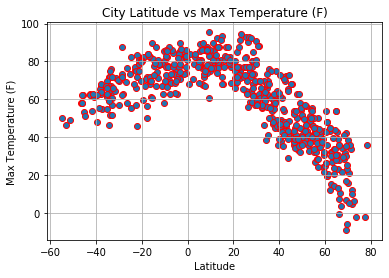

In [16]:
plt.scatter(cities_df["Latitude"], cities_df["Max Temp (F)"], edgecolor="red")
plt.grid()
plt.title("City Latitude vs Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

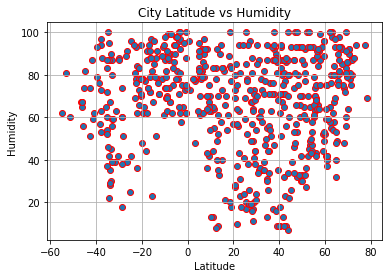

In [17]:
plt.scatter(cities_df["Latitude"], cities_df["Humidity"], edgecolor="red")
plt.grid()
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

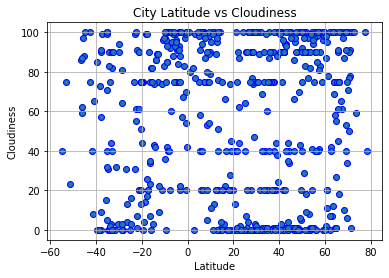

In [18]:
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"], edgecolor="blue")
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

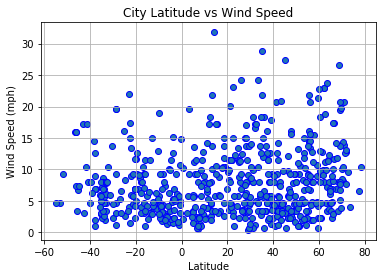

In [19]:
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed"], edgecolor="blue")
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

In [20]:
#Nothern Hemp vs Southern Hemp 
#The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):
#South Data 
north_hemp = cities_df[cities_df["Latitude"] >= 0]
south_hemp = cities_df[cities_df["Latitude"] < 0]

south_hemp.head()

,City,Latitude,Longitute,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,51.80,87,0,3.44,ZA,1618720191
2,Bluff,-46.6000,168.3333,57.99,67,86,15.99,NZ,1618720023
7,Punta Arenas,-53.1500,-70.9167,46.40,81,75,4.61,CL,1618720193
10,Arraial do Cabo,-22.9661,-42.0278,75.52,81,99,21.97,BR,1618720190
12,Hobart,-42.8794,147.3294,62.60,51,75,17.27,AU,1618720194


In [21]:
#Nothern Hemp vs Southern Hemp 
#The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):
#north data 
north_hemp = cities_df[cities_df["Latitude"] >= 0]
south_hemp = cities_df[cities_df["Latitude"] < 0]

north_hemp.head()

,City,Latitude,Longitute,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
1,Vung Tau,10.3460,107.0843,83.73,63,95,7.96,VN,1618720191
3,Ardeşen,41.1911,40.9875,60.80,67,75,20.71,TR,1618720192
4,Mehamn,71.0357,27.8492,34.93,78,78,13.82,NO,1618720040
5,Whitehorse,60.7161,-135.0538,48.20,40,1,4.61,CA,1618720097
6,Qaanaaq,77.4840,-69.3632,-2.22,94,100,6.64,GL,1618720193


##Northern Hemisphere - Max Temp vs. Latitude Linear Regression

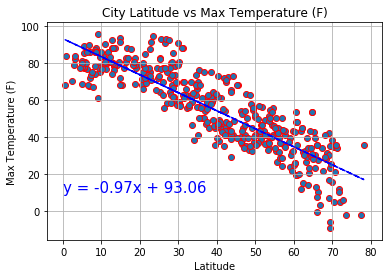

In [26]:
nx = north_hemp["Latitude"]
nmty = north_hemp["Max Temp (F)"]
(nmt_slope, nmt_intercept, nmt_rvalue, nmt_pvalue, nmt_stderr) = linregress(nx, nmty)
nmt_regress_values = nx * nmt_slope + nmt_intercept
line_eq = "y = " + str(round(nmt_slope,2)) + "x + " + str(round(nmt_intercept,2))
plt.annotate(line_eq,(0,10),fontsize=15,color="blue")
plt.plot(nx, nmt_regress_values,"b--")
plt.scatter(north_hemp["Latitude"], north_hemp["Max Temp (F)"], edgecolor="red")
plt.grid()
plt.title("City Latitude vs Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

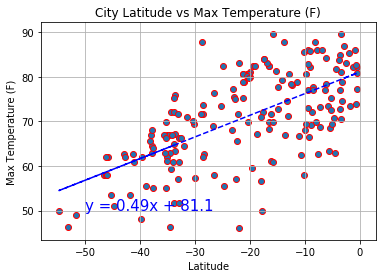

In [25]:
sx = south_hemp["Latitude"]
smty = south_hemp["Max Temp (F)"]
(smt_slope, smt_intercept, smt_rvalue, smt_pvalue, smt_stderr) = linregress(sx, smty)
smt_regress_values = sx * smt_slope + smt_intercept
line_eq = "y = " + str(round(smt_slope,2)) + "x + " + str(round(smt_intercept,2))
plt.annotate(line_eq,(-50,50),fontsize=15,color="blue")
plt.plot(sx, smt_regress_values,"b--")
plt.scatter(south_hemp["Latitude"], south_hemp["Max Temp (F)"], edgecolor="red")
plt.grid()
plt.title("City Latitude vs Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

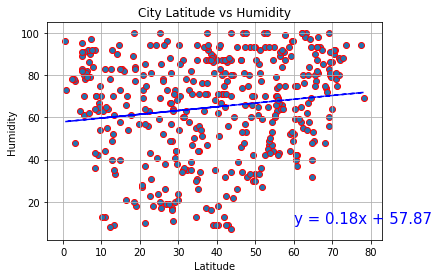

In [28]:
nhy = north_hemp["Humidity"]
(nh_slope, nh_intercept, nh_rvalue, nh_pvalue, nh_stderr) = linregress(nx, nhy)
nh_regress_values = nx * nh_slope + nh_intercept
line_eq = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_intercept,2))
plt.annotate(line_eq,(60,10),fontsize=15,color="blue")
plt.plot(nx, nh_regress_values,"b--")
plt.scatter(north_hemp["Latitude"], north_hemp["Humidity"], edgecolor="red")
plt.grid()
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

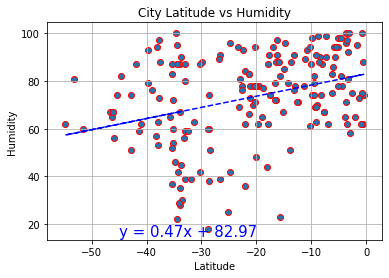

In [33]:
shy = south_hemp["Humidity"]
(sh_slope, sh_intercept, sh_rvalue, sh_pvalue, sh_stderr) = linregress(sx, shy)
sh_regress_values = sx * sh_slope + sh_intercept
line_eq = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_intercept,2))
plt.annotate(line_eq,(-45,15),fontsize=15,color="blue")
plt.plot(sx, sh_regress_values,"b--")
plt.scatter(south_hemp["Latitude"], south_hemp["Humidity"], edgecolor="red")
plt.grid()
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

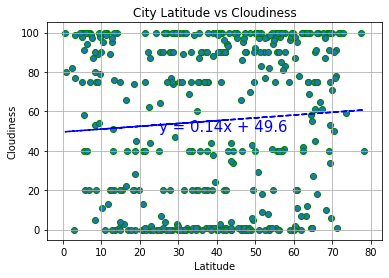

In [38]:
ncy = north_hemp["Cloudiness"]
(nc_slope, nc_intercept, nc_rvalue, nc_pvalue, nc_stderr) = linregress(nx, ncy)
nc_regress_values = nx * nc_slope + nc_intercept
line_eq = "y = " + str(round(nc_slope,2)) + "x + " + str(round(nc_intercept,2))
plt.annotate(line_eq,(25,50),fontsize=15,color="blue")
plt.plot(nx, nc_regress_values,"b--")
plt.scatter(north_hemp["Latitude"], north_hemp["Cloudiness"], edgecolor="green")
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

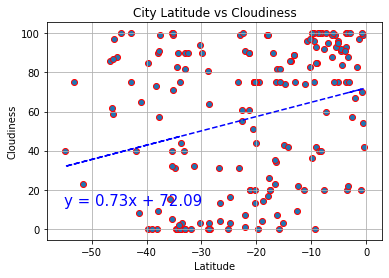

In [39]:
scy = south_hemp["Cloudiness"]
(sc_slope, sc_intercept, sc_rvalue, sc_pvalue, sc_stderr) = linregress(sx, scy)
sc_regress_values = sx * sc_slope + sc_intercept
line_eq = "y = " + str(round(sc_slope,2)) + "x + " + str(round(sc_intercept,2))
plt.annotate(line_eq,(-55,12),fontsize=15,color="blue")
plt.plot(sx, sc_regress_values,"b--")
plt.scatter(south_hemp["Latitude"], south_hemp["Cloudiness"], edgecolor="red")
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

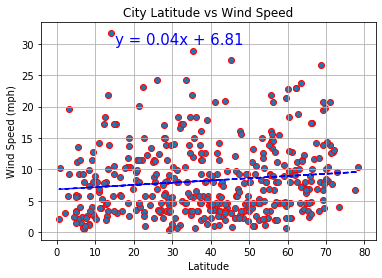

In [41]:
nwsy = north_hemp["Wind Speed"]
(nws_slope, nws_intercept, nws_rvalue, nws_pvalue, nws_stderr) = linregress(nx, nwsy)
nws_regress_values = nx * nws_slope + nws_intercept
line_eq = "y = " + str(round(nws_slope,2)) + "x + " + str(round(nws_intercept,2))
plt.annotate(line_eq,(15,30),fontsize=15,color="blue")
plt.plot(nx, nws_regress_values,"b--")
plt.scatter(north_hemp["Latitude"], north_hemp["Wind Speed"], edgecolor="red")
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

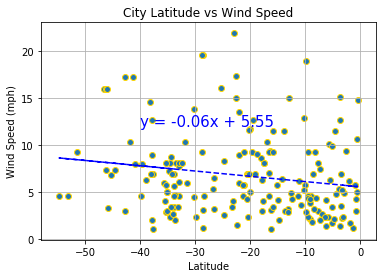

In [46]:
swsy = south_hemp["Wind Speed"]
(sws_slope, sws_intercept, sws_rvalue, sws_pvalue, sws_stderr) = linregress(sx, swsy)
sws_regress_values = sx * sws_slope + sws_intercept
line_eq = "y = " + str(round(sws_slope,2)) + "x + " + str(round(sws_intercept,2))
plt.annotate(line_eq,(-40,12),fontsize=15,color="blue")
plt.plot(sx, sws_regress_values,"b--")
plt.scatter(south_hemp["Latitude"], south_hemp["Wind Speed"], edgecolor="gold")
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()